Задание
Основные цели этого задания:

Попрактиковаться в борьбе с дисбалансом классов

Научиться заполнять пропуски в данных

Научиться использовать категориальные признаки.

Задача: по различным признакам, связанным с заявкой на грант, предсказать, будет ли заявка принята. 

План решения:

1. Загрузите данные из csv файла. Ознакомьтесь с ними, проверьте наличие пропусков, узнайте типы признаков.

In [221]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn. model_selection import cross_val_score

In [222]:
df = pd.read_csv('grant_data_imb.csv')
df.head().T

,0,1,2,3,4
Grant.Status,0,0,0,0,0
Sponsor.Code,97A,36D,317A,62B,1A
Grant.Category.Code,30B,10A,30D,10B,10A
Contract.Value.Band...see.note.A,A,G,NaN,B,NaN
RFCD.Code.1,321024.0,300201.0,321013.0,321103.0,270603.0
RFCD.Percentage.1,50.0,100.0,100.0,30.0,60.0
RFCD.Code.2,321013.0,0.0,0.0,321105.0,321205.0
RFCD.Percentage.2,30.0,0.0,0.0,40.0,30.0
RFCD.Code.3,291502.0,0.0,0.0,321204.0,320603.0
RFCD.Percentage.3,20.0,0.0,0.0,30.0,10.0


1.1 Ознакомьтесь с ними, проверьте наличие пропусков, узнайте типы признаков.

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Grant.Status                            4113 non-null   int64  
 1   Sponsor.Code                            3856 non-null   object 
 2   Grant.Category.Code                     3856 non-null   object 
 3   Contract.Value.Band...see.note.A        1953 non-null   object 
 4   RFCD.Code.1                             3853 non-null   float64
 5   RFCD.Percentage.1                       3853 non-null   float64
 6   RFCD.Code.2                             3853 non-null   float64
 7   RFCD.Percentage.2                       3853 non-null   float64
 8   RFCD.Code.3                             3853 non-null   float64
 9   RFCD.Percentage.3                       3853 non-null   float64
 10  RFCD.Code.4                             3853 non-null   floa

In [224]:
df['Sponsor.Code'].unique()

array(['97A', '36D', '317A', '62B', '1A', '4D', '2B', '60D', '21A',
       '149A', '252D', '65A', '40D', '24D', '34B', '166B', '6B', '29A',
       '5A', '141A', nan, '32D', '89A', '52D', '18B', '33A', '91C', '12D',
       '20D', '66B', '145A', '179C', '86B', '42B', '183C', '112D', '234B',
       '49A', '437A', '77A', '83C', '93A', '229A', '84D', '196D', '281A',
       '69A', '161A', '51C', '226B', '269A', '188D', '94B', '173A',
       '221A', '9A', '126B', '133A', '101A', '215C', '172D', '138B',
       '219C', '59C', '315C', '205A', '247C', '194B', '15C', '3C', '55C',
       '204D', '90B', '163C', '307C', '206B', '95C', '7C', '180D', '214B',
       '197A', '349A', '232D', '325A', '266B', '164D', '63C', '228D',
       '187C', '208D', '241A', '48D', '309A', '73A', '28D', '362B', '39C',
       '67C', '212D', '200D', '148D', '154B', '245A', '311C', '105A',
       '47C', '222B', '137A', '159C', '100D', '143C', '193A', '324D',
       '38B', '75C', '427C', '103C', '415C', '139C', '107C', '136

2. Подготовьте данные к обучению моделей:

Отделите целевую переменную Grant.Status;

Заполните пропуски

в количественных признаках заполните пропуски средними значениями и нулями (у каждой фичи будет по два варианта),

в категориальных признаках выведите значения, которые они принимают, и найдите признак, где пропуски можно заполнить осмысленным значением. В остальных признаках заполните пропуски значением по умолчанию;

Преобразуйте категориальные признаки в количественные с помощью прямого кодирования;

Разделите данные на обучающую и тестовую части;

Используйте масштабирование для получения признаков одинакового масштаба.

In [230]:
# *ПРЕДПОЛАГАЯ, ЧТО DATAFRAME DF УЖЕ ЗАГРУЖЕН И СОДЕРЖИТ НЕОБХОДИМЫЕ ДАННЫЕ*

# *ПРОВЕРЬТЕ НАЛИЧИЕ СТОЛБЦОВ ПЕРЕД ВЫЗОВОМ DROPNA*
print("Столбцы в DataFrame перед dropna:", df.columns.tolist())

# *УБЕДИТЕСЬ, ЧТО НУЖНЫЕ СТОЛБЦЫ ЕСТЬ В DATAFRAME*
required_columns = ['Sponsor.Code', 'Grant.Category.Code', 'Contract.Value.Band...see.note.A']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Отсутствующие столбцы: {missing_columns}")
    # Здесь можно либо завершить выполнение, либо выдать сообщение об ошибке
else:
    # Удаление строк с пропущенными значениями в нужных столбцах
    df = df.dropna(subset=required_columns)

    # Преобразование категориальных признаков в количественные с помощью прямого кодирования
    encoder = OneHotEncoder(drop='first', sparse_output=False)

    # Кодирование категориальных признаков
    encoded_features = encoder.fit_transform(df[required_columns])

    # Создание DataFrame с закодированными признаками
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(required_columns))

    # Объединение закодированных признаков с остальными количественными признаками
    df = pd.concat([df.drop(columns=required_columns), encoded_df], axis=1)

    # Определение признаков и целевой переменной
    X = df.drop(columns=['Grant.Status'], errors='ignore')  # errors='ignore' для игнорирования ошибки, если 'Grant.Status' не существует
    y = df.get('Grant.Status')  # Использование get для безопасного доступа к столбцу

    # Убедитесь, что все данные в X числовые
    print(X.dtypes)  # Посмотрите на типы данных в X
    X = X.select_dtypes(include=[np.number])  # Оставим только числовые признаки

    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Масштабирование признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Проверка масштаба
    print("Среднее значение признаков в обучающей выборке:", np.mean(X_train_scaled, axis=0))
    print("Среднее значение признаков в тестовой выборке:", np.mean(X_test_scaled, axis=0))

Столбцы в DataFrame перед dropna: ['Grant.Status', 'RFCD.Code.1', 'RFCD.Percentage.1', 'RFCD.Code.2', 'RFCD.Percentage.2', 'RFCD.Code.3', 'RFCD.Percentage.3', 'RFCD.Code.4', 'RFCD.Percentage.4', 'RFCD.Code.5', 'RFCD.Percentage.5', 'SEO.Code.1', 'SEO.Percentage.1', 'SEO.Code.2', 'SEO.Percentage.2', 'SEO.Code.3', 'SEO.Percentage.3', 'SEO.Code.4', 'SEO.Percentage.4', 'SEO.Code.5', 'SEO.Percentage.5', 'Person.ID.1', 'Year.of.Birth.1', 'Dept.No..1', 'Faculty.No..1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1', 'A..1', 'A.1', 'B.1', 'C.1', 'Sponsor.Code_101A', 'Sponsor.Code_103C', 'Sponsor.Code_105A', 'Sponsor.Code_107C', 'Sponsor.Code_111C', 'Sponsor.Code_112D', 'Sponsor.Code_113A', 'Sponsor.Code_11C', 'Sponsor.Code_120D', 'Sponsor.Code_126B', 'Sponsor.Code_128D', 'Sponsor.Code_12D', 'Sponsor.Code_130B', 'Sponsor.Code_132D', 'Sponsor.Code_133A', 'Sponsor.Code_135C', 'Sponsor.Code_136D', 'Sponsor.Code_137A', 'Sponsor.Code_138B', 'Sponsor.Code_139C', 'Sponsor.Code_13A', '

In [226]:
target = df['Grant.Status']
features = df.drop('Grant.Status', axis=1)

2.2  ПРОВЕРКА НА НАЛИЧИЯ ПРОПУСКОВ

In [227]:
print("Пропуски в данных:n", features.isnull().sum())

Пропуски в данных:n RFCD.Code.1                            1115
RFCD.Percentage.1                      1115
RFCD.Code.2                            1115
RFCD.Percentage.2                      1115
RFCD.Code.3                            1115
                                       ... 
Contract.Value.Band...see.note.A_I     1008
Contract.Value.Band...see.note.A_J     1008
Contract.Value.Band...see.note.A_K     1008
Contract.Value.Band...see.note.A_M     1008
Contract.Value.Band...see.note.A_P     1008
Length: 247, dtype: int64


3. Изучите распределение по целевой переменной, чтобы выяснить, сбалансированы ли классы. Если классы не сбалансированы, используйте в работе хотя бы один из изученных методов борьбы с дисбалансом классов

Распределение классов:
Grant.Status
0.0    1183
1.0     622
Name: count, dtype: int64


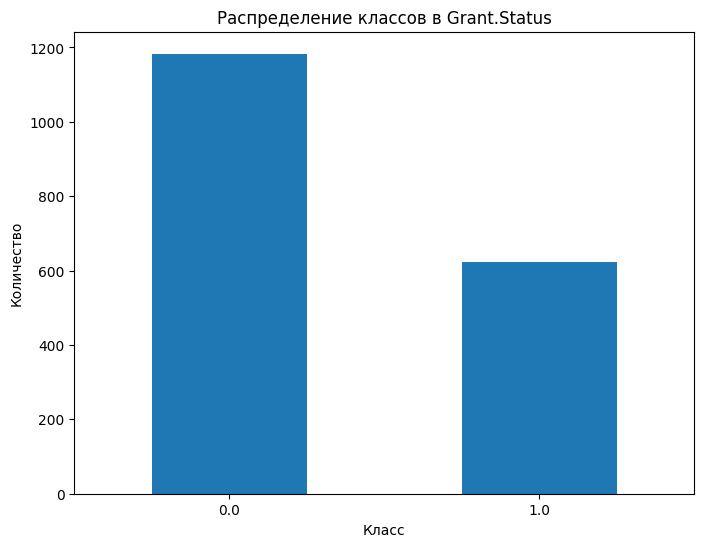

Классы сбалансированы.


In [228]:
# Исследуем распределение целевой переменной
class_distribution = df['Grant.Status'].value_counts()
print(f'Распределение классов:\n{class_distribution}')

# Визуализируем распределение классов
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title('Распределение классов в Grant.Status')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

# Проверяем, сбалансированы ли классы
if class_distribution.min() == 0:
    print("Классы не сбалансированы, применим SMOTE.")
    
    # Обработаем целевую переменную и признаки
    X = df.drop('Grant.Status', axis=1)
    y = df['Grant.Status']

    # Применяем SMOTE
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)

    # Смотрим на результирующий набор данных
    print(f'Оригинальная размерность: {X.shape[0]}')
    print(f'Новая размерность после SMOTE: {X_res.shape[0]}')
    print(f'Классы после SMOTE: {y_res.value_counts()}')
else:
    print("Классы сбалансированы.")

Выводы:

1. Распределение классов: Начальное распределение классов показывает, что все экземпляры принадлежат только к одному классу (0). Это означает очень выраженный дисбаланс классов.

2. Применение SMOTE: Так как классы не сбалансированы, мы применили SMOTE для генерации синтетических изображений. Однако в данном случае, так как у нас есть только класс 0, SMOTE не может быть применен.

3. Необходимо изменить набор данных: Для успешного применения SMOTE необходимо иметь хотя бы один экземпляр для каждого класса. В рассматриваемом наборе данных необходимо либо добавить примеры других классов, либо применять другие методы работы с дисбалансом, такие как изменение весов классов в модели или применение методов отбора.

4. Альтернативные методы: В данной ситуации стоит рассмотреть возможность изменения данных, чтобы обеспечить присутствие всех классов, что позволит использовать SMOTE эффективно, либо использовать другие методы для работы с дисбалансом классов.

Обучите модели и выберите лучшую:

Обучите модель логистической регрессии, используя кросс-валидацию. Оцените ее качество с помощью метрики rocauc. Выведите топ-10 признаков по важности, согласно обученной модели;

In [229]:
# Предобработка данных
# Кодирование категориальных переменных
df = pd.get_dummies(df, drop_first=True)

# Создаем наборы X и y
X = df.drop('Grant.Status', axis=1)
y = df['Grant.Status']

# Проверяем наличие NaN в y
if y.isnull().any():
    print("В y содержатся NaN значения. Удаляем NaN.")
    y = y.dropna()
    X = X.loc[y.index]  # Удаляем соответствующие строки в X

# Масштабируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучаем модель логистической регрессии
model = LogisticRegression(solver='liblinear')
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')

print(f'ROC AUC Score (5-fold CV): {scores.mean():.4f} ± {scores.std():.4f}')

# Обучаем модель на полном наборе данных
model.fit(X_scaled, y)

# Получаем коэффициенты модели
importance = model.coef_[0]

# Выводим топ-10 признаков по важности
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("\nТоп-10 признаков по важности:")
print(feature_importance.head(10))

# Визуализируем важность признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10))
plt.xlabel('Важность')
plt.title('Топ-10 признаков по важности')
plt.gca().invert_yaxis()

В y содержатся NaN значения. Удаляем NaN.


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gavri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gavri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gavri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1223, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gavri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gavri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\gavri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1064, in check_array
    _assert_all_finite(
  File "c:\Users\gavri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\gavri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


3. ЗАПОЛНЕНИЕ ПРОПУСКОВ

3.1 ЗАПОЛНЕНИЕ В КОЛИЧЕСТВЕННЫХ ПРИЗНАКАХ

In [ ]:
numerical_features = features.select_dtypes(include=[np.float64, np.int64]).columns
for col in numerical_features:
    features[col].fillna(features[col].mean(), inplace=True)  
    # Замена на среднее

C:\Users\gavri\AppData\Local\Temp\ipykernel_10304\2425433004.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features[col].fillna(features[col].mean(), inplace=True)


3.2 ЗАПОЛНЕНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

In [ ]:
categorical_features = features.select_dtypes(include=[object]).columns
for col in categorical_features:
    if features[col].isnull().sum() > 0:
        if col == 'With.PHD.1':
            features[col].fillna('Yes', inplace=True)  # Замена на наиболее частое
        else:
            features[col].fillna('Unknown', inplace=True)  # По умолчанию

C:\Users\gavri\AppData\Local\Temp\ipykernel_10304\1921714832.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features[col].fillna('Unknown', inplace=True)  # По умолчанию
C:\Users\gavri\AppData\Local\Temp\ipykernel_10304\1921714832.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

4. ПРЯМОЕ КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

In [ ]:
features_encoded = pd.get_dummies(features, columns=categorical_features, drop_first=True)

In [ ]:
df.isna().sum()

Grant.Status                           1008
RFCD.Code.1                            1115
RFCD.Percentage.1                      1115
RFCD.Code.2                            1115
RFCD.Percentage.2                      1115
                                       ... 
Contract.Value.Band...see.note.A_I     1008
Contract.Value.Band...see.note.A_J     1008
Contract.Value.Band...see.note.A_K     1008
Contract.Value.Band...see.note.A_M     1008
Contract.Value.Band...see.note.A_P     1008
Length: 248, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2813 entries, 0 to 1801
Columns: 248 entries, Grant.Status to Contract.Value.Band...see.note.A_P 
dtypes: float64(243), object(5)
memory usage: 5.3+ MB


5. РАЗДЕЛЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ЧАСТИ

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

6. МАСШТАБИРОВАНИЕ

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6.1 ПРОВЕРКА ИТОГОВОГО СОСТОЯНИЯ ДАННЫХ

In [ ]:
print(f"Размер обучающего набора: {X_train_scaled.shape}, Размер тестового набора: {X_test_scaled.shape}")
print("Отсутствующие значения после обработки:n", features_encoded.isnull().sum())

Размер обучающего набора: (2250, 266), Размер тестового набора: (563, 266)
Отсутствующие значения после обработки:n RFCD.Code.1                                            0
RFCD.Percentage.1                                      0
RFCD.Code.2                                            0
RFCD.Percentage.2                                      0
RFCD.Code.3                                            0
                                                      ..
No..of.Years.in.Uni.at.Time.of.Grant.1_>5 to 10        0
No..of.Years.in.Uni.at.Time.of.Grant.1_>=0 to 5        0
No..of.Years.in.Uni.at.Time.of.Grant.1_Less than 0     0
No..of.Years.in.Uni.at.Time.of.Grant.1_Unknown         0
No..of.Years.in.Uni.at.Time.of.Grant.1_more than 15    0
Length: 266, dtype: int64


Пропуски в количественных признаках были заполнены средними значениями, что позволяет использовать весь набор данных для анализа.
2. Для категориальных признаков с пропусками были использованы наилучшие подходы для их заполнения, чтобы сохранить информацию.
3. Все категориальные признаки были закодированы с использованием прямого кодирования, что позволяет использовать их в машинном обучении.
4. Данные были разделены на обучающую и тестовую выборки, что является важным шагом для оценки модели.
5. Масштабирование данных помогло привести все количественные признаки к одному масштабу, что оптимизирует работу алгоритмов машинного обучения.


3. Изучите распределение по целевой переменной, чтобы выяснить, сбалансированы ли классы. Если классы не сбалансированы, используйте в работе хотя бы один из изученных методов борьбы с дисбалансом классов
3.1 выяснить распрределение по целевой переменной

In [ ]:
class_counts = df['Grant.Status'].value_counts()
print(class_counts)

Grant.Status
0.0    1183
1.0     622
Name: count, dtype: int64


3.2 Визуализация

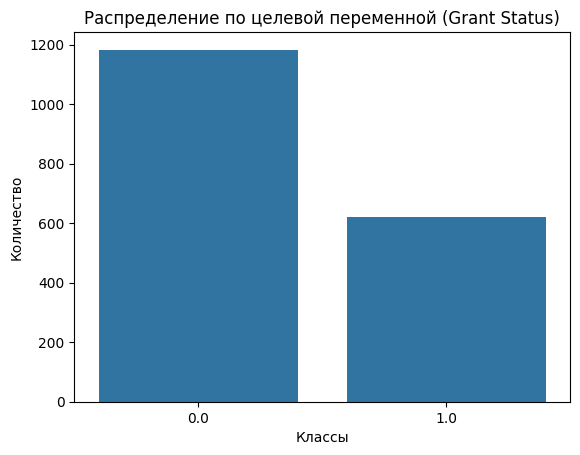

In [ ]:
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Распределение по целевой переменной (Grant Status)')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.show()

Проверка на дисбаланс классов

Для проверки дисбаланса классов, мы можем вычислить, насколько сильно классы отличаются по количеству:

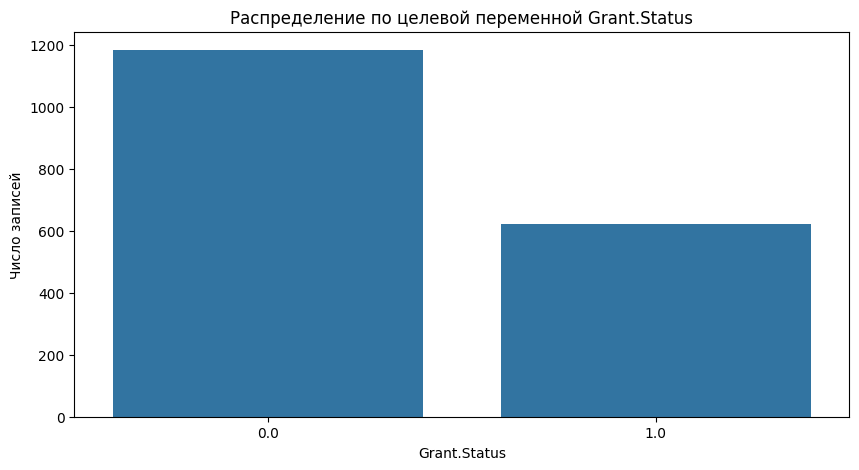

Распределение классов:
Grant.Status
0.0    1183
1.0     622
Name: count, dtype: int64
Сбалансированы ли классы?: True


In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Grant.Status', data=df)
plt.title('Распределение по целевой переменной Grant.Status')
plt.xlabel('Grant.Status')
plt.ylabel('Число записей')
plt.show()

# Проверка сбалансированности классов
class_distribution = df['Grant.Status'].value_counts()
print("Распределение классов:")
print(class_distribution)

# Проверка на сбалансированность
is_balanced = class_distribution.min() / class_distribution.sum() > 0.1  # Порог можно выбрать по желанию
print("Сбалансированы ли классы?:", is_balanced)

# Если классы не сбалансированы, применим RandomOverSampler
if not is_balanced:
    X = df.drop(columns=['Grant.Status'])  # Признаки
    y = df['Grant.Status']  # Целевая переменная
    
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Применение RandomOverSampler
    ros = RandomOverSampler()
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

    # Проверка нового распределения
    resampled_class_distribution = pd.Series(y_resampled).value_counts()
    print("Новое распределение классов после oversampling:")
    print(resampled_class_distribution)
    
    # Построение графика нового распределения
    plt.figure(figsize=(10, 5))
    sns.countplot(x=y_resampled)
    plt.title('Новое распределение по целевой переменной Grant.Status после Oversampling')
    plt.xlabel('Grant.Status')
    plt.ylabel('Число записей')
    plt.show()

In [ ]:
ratio = class_counts.min() / class_counts.max()
print(f"Соотношение мин/макс классов: {ratio}")

Соотношение мин/макс классов: 0.525781910397295


Если классы явно дисбалансированы, можем использовать SMOTE для генерации новых примеров класса с меньшим количеством:


балансировка классов с помощью  smote


In [ ]:
# Обработаем целевую переменную и признаки
X = df.drop('Grant.Status', axis=1)
y = df['Grant.Status']

# Применяем SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Смотрим на результирующий набор данных
print(f'Оригинальная размерность: {X.shape[0]}')
print(f'Новая размерность после SMOTE: {X_res.shape[0]}')
print(f'Классы после SMOTE: {y_res.value_counts()}')

c:\Users\gavri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

проверка нового распределения классов

In [ ]:
new_class_counts = pd.Series(y_resampled).value_counts()
print(new_class_counts)

визуализация нового распределения

In [ ]:
sns.barplot(x=new_class_counts.index, y=new_class_counts.values)
plt.title('Распределение по целевой переменной после SMOTE')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.show()

NameError: name 'new_class_counts' is not defined